In [17]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

%matplotlib inline

In [4]:
df = pd.read_csv('turnstile_180922.csv')

current_d = datetime.datetime(2018, 9, 22)

In [5]:
#this is for more data
# for i in range(0,1):
#     #modify the .csv string
#     new_date = current_d - datetime.timedelta(days = 7*(i+1))
#     url = 'http://web.mta.info/developers/data/nyct/turnstile/turnstile_' + new_date.strftime('%y%m%d') + '.txt'
#     #modify the df name
#     dft = pd.read_csv(url)
#     dfs = [df, dft]
#     pd.concat(dfs)

In [6]:
df.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/15/2018,00:00:00,REGULAR,6759219,2291425
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/15/2018,04:00:00,REGULAR,6759234,2291429
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/15/2018,08:00:00,REGULAR,6759251,2291453
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/15/2018,12:00:00,REGULAR,6759330,2291532
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/15/2018,16:00:00,REGULAR,6759538,2291574


In [7]:
# Cleaning up column names
df.rename(columns=lambda x: x.strip(),inplace='True')

df.rename(columns={'ENTRIES': 'CUMULATIVE_ENTRIES', 'EXITS': 'CUMULATIVE_EXITS'}, inplace=True)

In [8]:
# df3 = df[(df['STATION'] == '59 ST')].copy()

# #Remove times which are not 0h,4h,8h,12h,16h or 20h
# df3 = df3[(df3['TIME'] == '00:00:00') | \
#           (df3['TIME'] == '04:00:00') | \
#           (df3['TIME'] == '08:00:00') | \
#           (df3['TIME'] == '12:00:00') | \
#           (df3['TIME'] == '16:00:00') | \
#           (df3['TIME'] == '20:00:00')].copy()



# df3 = df3.groupby(['DATE','TIME']).sum()

# # Calculating net entries, net exits and net traffic
# df3['NET_ENTRIES'] = df3['CUMULATIVE_ENTRIES'].diff()

# df3['NET_EXITS'] = df3['CUMULATIVE_EXITS'].diff()

# df3['NET_TRAFFIC'] = df3['NET_EXITS'] + df3['NET_ENTRIES']



# # Plot of all SCPs summed for one station
# df3.NET_TRAFFIC.plot()



In [9]:
idx = pd.IndexSlice

In [11]:
#clean data
date = '09/15/2018'
time = '08:00:00'

df4 = df[(df['TIME'] == '00:00:00') | \
          (df['TIME'] == '04:00:00') | \
          (df['TIME'] == '08:00:00') | \
          (df['TIME'] == '12:00:00') | \
          (df['TIME'] == '16:00:00') | \
          (df['TIME'] == '20:00:00')].copy()

df4['NET_ENTRIES'] = df4['CUMULATIVE_ENTRIES'].diff()

df4['NET_EXITS'] = df4['CUMULATIVE_EXITS'].diff()

df4['NET_TRAFFIC'] = df4['NET_EXITS'] + df4['NET_ENTRIES']



df4 = df4[(df4['NET_ENTRIES'] > 0) & (df4['NET_ENTRIES'] < 10000) & (df4['NET_EXITS'] > 0) & (df4['NET_EXITS'] < 10000)]

df4[(df4.TIME == '00:00:00') & (df4.DATE == '09/15/2018')] = np.nan

df4.dropna(inplace = True)
# sns.boxplot(df4.NET_TRAFFIC)
df_clean = df4
df_clean

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,CUMULATIVE_ENTRIES,CUMULATIVE_EXITS,NET_ENTRIES,NET_EXITS,NET_TRAFFIC
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/15/2018,04:00:00,REGULAR,6759234.0,2291429.0,15.0,4.0,19.0
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/15/2018,08:00:00,REGULAR,6759251.0,2291453.0,17.0,24.0,41.0
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/15/2018,12:00:00,REGULAR,6759330.0,2291532.0,79.0,79.0,158.0
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/15/2018,16:00:00,REGULAR,6759538.0,2291574.0,208.0,42.0,250.0
5,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/15/2018,20:00:00,REGULAR,6759808.0,2291608.0,270.0,34.0,304.0
6,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/16/2018,00:00:00,REGULAR,6759951.0,2291626.0,143.0,18.0,161.0
7,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/16/2018,04:00:00,REGULAR,6759968.0,2291630.0,17.0,4.0,21.0
8,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/16/2018,08:00:00,REGULAR,6759987.0,2291639.0,19.0,9.0,28.0
9,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/16/2018,12:00:00,REGULAR,6760045.0,2291661.0,58.0,22.0,80.0
10,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/16/2018,16:00:00,REGULAR,6760160.0,2291672.0,115.0,11.0,126.0


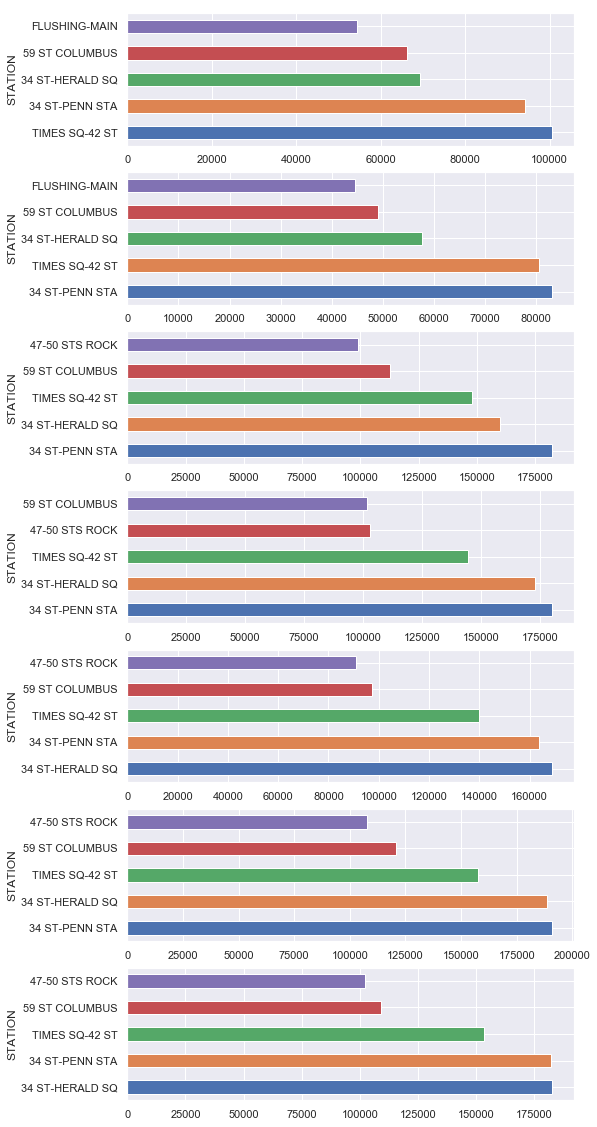

In [55]:
#Add all 8-8 shifts for each day to see which station to send street team
df_worktime = df_clean[(df_clean.TIME == '12:00:00') | \
                       (df_clean.TIME == '16:00:00') | \
                       (df_clean.TIME == '20:00:00')]

dates = [i for i in df_worktime.DATE.unique()]
df_days_shifts = []

for date in dates:
    df_single_day = df_worktime[df_worktime.DATE == date]
    df_single_day = df_single_day.groupby('STATION').sum().sort_values('NET_TRAFFIC', ascending = False).head()
    df_days_shifts.append(df_single_day)
    
for i, day in enumerate(df_days_shifts):
    plt.subplot(len(dates),1,i+1)
    day.NET_TRAFFIC.plot(kind = 'barh', figsize = [8,20])

In [13]:
# finding the top 10 stations overall
df_clean.groupby('STATION').sum().sort_values('NET_TRAFFIC', ascending = False).head(10)

,CUMULATIVE_ENTRIES,CUMULATIVE_EXITS,NET_ENTRIES,NET_EXITS,NET_TRAFFIC
STATION,,,,,
34 ST-PENN STA,6.722391e+10,6.969879e+10,696523.0,663396.0,1359919.0
34 ST-HERALD SQ,6.335688e+10,5.474793e+10,648896.0,586666.0,1235562.0
TIMES SQ-42 ST,1.590058e+11,7.255554e+10,616688.0,585596.0,1202284.0
59 ST COLUMBUS,1.295536e+11,1.197138e+11,454457.0,367340.0,821797.0
GRD CNTRL-42 ST,3.160418e+10,2.812132e+10,441736.0,272331.0,714067.0
59 ST,1.542533e+10,8.592069e+09,382386.0,321260.0,703646.0
FLUSHING-MAIN,7.776745e+09,7.311829e+09,355718.0,284446.0,640164.0
CHAMBERS ST,1.727357e+11,1.062950e+11,352972.0,277947.0,630919.0
86 ST,1.741137e+10,1.465162e+10,322535.0,291604.0,614139.0


In [14]:
# df5 = df4[df4['STATION'] == 'TIMES SQ-42 ST'].sort_values('NET_ENTRIES',ascending = False)
# df5 = df5.groupby(['DATE','TIME']).sum()
# df5

#df5 = df4.loc[(idx[:], '09/15/2018', '08:00:00'), :]

# plt.scatter(df4, df4.NET_TRAFFIC)
# df4 = df4.groupby(['STATION','DATE','TIME']).sum()
# #df4 = df4[not((df4['TIME'] == '00:00:00') & (df4['DATE'] == '09/15/2018'))]
# df4.loc[(idx[:], '09/15/2018', '00:00:00'), :] = np.nan
# df4.dropna(inplace=True)
# df5 = df4.loc[(idx[:], '09/15/2018', '08:00:00'), :]
# df5

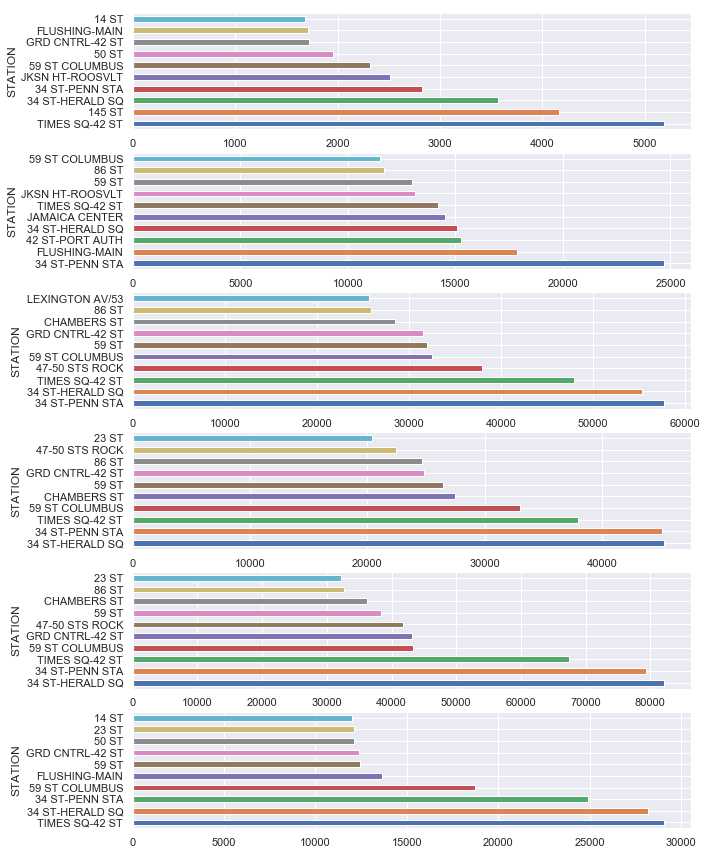

In [19]:
#find all stations in one specific time

date_list = list(df_clean.DATE.unique())
time_list = list(df_clean.TIME.unique())

all_shifts_series = []
all_shifts_df = []

#constructs list that contains pd series that contains the top 10 busiest stations for each datetime
#made list that contains other columns but same rows and groupby
# for date in date_list:
#     for time in time_list:
#             df_one = df4[(df4.DATE == date) & (df4.TIME == time)]
#             df_one = df_one.groupby('STATION').sum().sort_values('NET_TRAFFIC', ascending = False)
#             df_one = df_one#.head(10)
#             all_shifts_df.append(df_one)
#             df_two = df_one.NET_TRAFFIC
#             all_shifts_series.append(df_two)

# list of 12 hour period traffic for each day   
for date in date_list:
    for time in time_list:
            df_one = df_clean[(df_clean.DATE == date) & (df_clean.TIME == time)]
            df_one = df_one.groupby('STATION').sum().sort_values('NET_TRAFFIC', ascending = False)
            df_one = df_one.head(10)
            all_shifts_df.append(df_one)
            df_two = df_one.NET_TRAFFIC
            all_shifts_series.append(df_two)
            
#plots all days and shifts

# for n_date in range(0,7):
#     for n_time in range (0,6):
#         plot_num = n_date*6 + n_time + 1
#         if plot_num == 6:
#             break
#         plt.subplot(7, 6, plot_num)
#         all_shifts_df[plot_num - 1].NET_TRAFFIC.plot(kind = 'bar', figsize = [20,20])
#     break
# plt.subplot(7,6,7)
# all_shifts_df[6].NET_TRAFFIC.plot(kind = 'bar', figsize = [20,20])

# only plot shifts on Friday

for i in range(0,6):
    plt.subplot(6,1,i+1)
    all_shifts_df[36 + i].NET_TRAFFIC.plot(kind = 'barh', figsize = [10,15])
    


become master of plotting stuff